In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2) # setting seaborn default for plots
%matplotlib inline
print('imported successfully')

imported successfully


In [0]:
#importing the dataset NOTE: to get files from dektop, you can do Inser->Code snippet->Files->Upload
dataset = pd.read_csv('train.csv')
dataset=dataset[dataset['Embarked'].notnull()] #drops null value in column
dataset.head() #prints the dataset table below (do .head() to only get first 5 rows)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


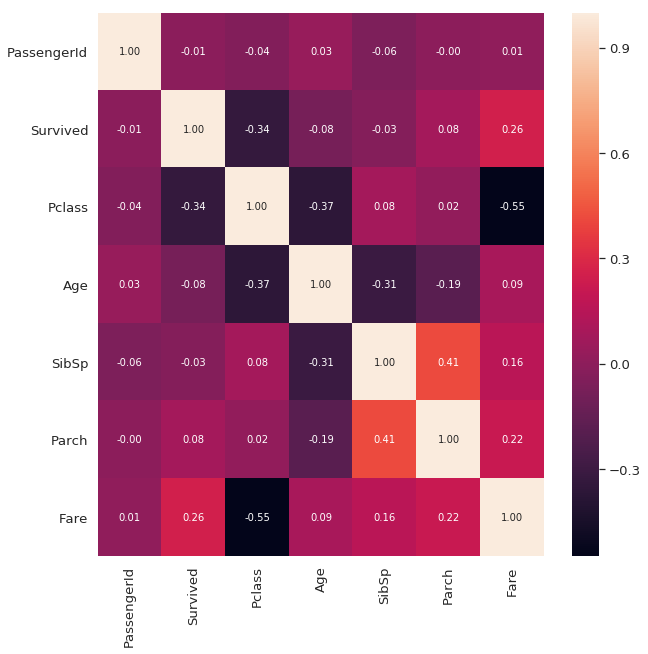

In [0]:
#generate heatmap to see relation between Survival and other factors
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', ax=ax) #data.corr() is correlation of all data items ; annot=True prints correlation values inside the heatmap, fmt='.2f' prints only two decimal numbers
plt.show()

In [0]:
#Label encoding
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder() 

#encoding sex
encoder.fit(dataset['Sex']) #if problem, try adding encoder= at beginning OR RUN CODES FROM BEGINNING
dataset['Sex']=encoder.transform(dataset['Sex'])
list(encoder.classes_) #see what (/how many) values were encoded

#IF MANUALLY
# sex_encoding = {"male": 0, "female": 1}
# for data in dataset:
#     data['Sex'] = data['Sex'].map(sex_encoding)
#     DON'T FORGET TO DO dataset['Sex']=data['Sex'] to modify actual set (like below with data2)

    
# encoding fare 
# for data in dataset:
#     data.loc[dataset['Fare'] <= 18, 'Fare'] = 0,
#     data.loc[(dataset['Fare'] > 18) & (data['Fare'] <= 30), 'Fare'] = 1,
#     data.loc[(dataset['Fare'] > 30) & (data['Fare'] <= 60), 'Fare'] = 2,
#     data.loc[(dataset['Fare'] > 60) & (data['Fare'] <= 110), 'Fare'] = 3,
#     data.loc[dataset['Fare'] >= 100, 'Fare'] = 4


#encoding name
sep = ',';
data2 = [] #temp array used to modify dataset in for loop
for data in dataset['Name']:
  data2.append(data.split(sep, 1)[0]) #seperating string in Name column and keeping first part
  #print(data)
dataset['Name'] = data2

#dataset['Name']=dataset['Name'].apply(lambda x : x.split(sep, 1)[0]) #ALTERNATIVE WAY TO for loop above

encoder.fit(dataset['Name']) #if problem, try adding encoder= at beginning OR RUN CODES FROM BEGINNING
dataset['Name']=encoder.transform(dataset['Name'])


#encode Embarked
encoder.fit(dataset['Embarked'])
dataset['Embarked']=encoder.transform(dataset['Embarked'])


dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,73,1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,136,0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,251,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,198,0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,11,1,35.0,0,0,373450,8.0500,NaN,2


In [0]:
#Dropping irrelevant columns
dataset.drop(['Ticket'], axis=1, inplace=True) # delete feature from dataset ; axis=1 means column (0 for row)
dataset.drop(['Cabin'], axis=1, inplace=True)

#making everything numeric first
temp=dataset[dataset.columns]
temp=temp.convert_objects(convert_numeric=True)
temp.head()

#replacing null values by mean (the text elements should be encoded and replaced first)
dataset.isnull().sum() #to see how much null values we have in each column
for i in temp.columns:
  dataset[i]=temp[i].fillna(temp[i].mean())
  print(dataset[i].isnull().sum())


dataset.head()

0
0
0
0
0
0
0
0
0
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,73,1,22.0,1,0,7.2500,2
1,2,1,1,136,0,38.0,1,0,71.2833,0
2,3,1,3,251,0,26.0,0,0,7.9250,2
3,4,1,1,198,0,35.0,1,0,53.1000,2
4,5,0,3,11,1,35.0,0,0,8.0500,2


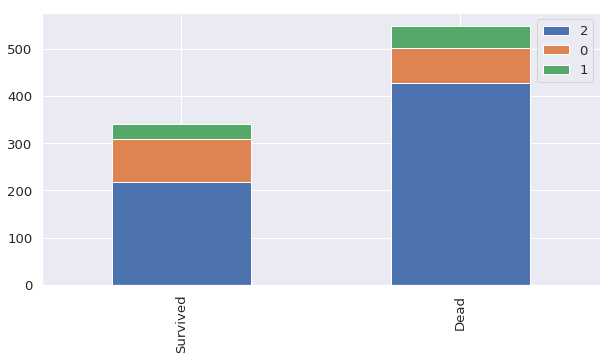

In [0]:
def bar_chart(feature):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    chart = pd.DataFrame([survived,dead])
    chart.index = ['Survived','Dead']
    chart.plot(kind='bar',stacked=True, figsize=(10,5))
    
def showVal(feature):
  print('\n'+feature)
  print("Survived :\n", dataset[dataset['Survived']==1][feature].value_counts())
  print("Dead:\n", dataset[dataset['Survived']==0][feature].value_counts())
    
#bar_chart('Age') #the chart looks TERRIBLE
bar_chart('Embarked')
# showVal('Fare')

In [0]:
showVal('Sex')
showVal('Embarked')
showVal('SibSp')
# showVal('Age')


Sex
Survived :
 0    231
1    109
Name: Sex, dtype: int64
Dead:
 1    468
0     81
Name: Sex, dtype: int64

Embarked
Survived :
 2    217
0     93
1     30
Name: Embarked, dtype: int64
Dead:
 2    427
0     75
1     47
Name: Embarked, dtype: int64

SibSp
Survived :
 0    208
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


In [0]:
#splitting dataset to train and test (NOT test.csv use that to predict)
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,2:].values  # store all columns (excpet first 2) as inputs in X
y = dataset.iloc[:,1].values  # store the second column as the output (label) in y
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(X)
#print(y)
dataset.head()

(711, 8) (711,)
(178, 8) (178,)
[[  3.      73.       1.     ...   0.       7.25     2.    ]
 [  1.     136.       0.     ...   0.      71.2833   0.    ]
 [  3.     251.       0.     ...   0.       7.925    2.    ]
 ...
 [  3.     292.       0.     ...   2.      23.45     2.    ]
 [  1.      52.       1.     ...   0.      30.       0.    ]
 [  3.     159.       1.     ...   0.       7.75     1.    ]]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,73,1,22.0,1,0,7.2500,2
1,2,1,1,136,0,38.0,1,0,71.2833,0
2,3,1,3,251,0,26.0,0,0,7.9250,2
3,4,1,1,198,0,35.0,1,0,53.1000,2
4,5,0,3,11,1,35.0,0,0,8.0500,2


In [0]:
#Prediction algorithm and accuracy
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train, y_train)
pred=clf.predict(x_test) #compare with y_test values below
y_test
print(clf.score(x_test, y_test)) #get "accuracy" of prediction Not actual accuracy of prediction, a number similar to it
print("Accuracy : %.2f" % (accuracy_score(pred, y_test) * 100)) #GETS ACTUAL ACCURACY

0.7865168539325843
Accuracy : 78.65


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Using XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, confusion_matrix

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth=6,
                           learning_rate=0.1,
                           n_estimators=100,
                           gamma=0,
                           subsample=1,
                            ) #NOTE: use XGBClassifier NOT Regressor
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print('RMSE: ',np.sqrt(mse)) #RMSE (the lower its value the more accurate it is)
print(confusion_matrix(y_test, y_pred))
print(xgb_model.score(x_test, y_test)) #WTF???? Not actual accuracy of prediction, a number similar to it
print("Accuracy : %.2f" % (accuracy_score(y_pred, y_test) * 100)) #GETS ACTUAL ACCURACY

# xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
# xgb_model.fit(x_train, y_train)
# y_pred = xgb_model.predict(x_test)


RMSE:  0.4434289272060925
[[90 16]
 [19 53]]
0.8033707865168539
Accuracy : 80.34


In [0]:
#NOW FOR test.csv
from sklearn.metrics import accuracy_score 
#if ERROR: Found input variables with inconsistent numbers of samples: [87, 418] => MAKE SURE YOUR results and df FILES HAVE SAME NUMBER OF ROWS
df = pd.read_csv('test.csv')
df.drop(['Ticket'], axis=1, inplace=True) # delete feature from dataset ; axis=1 means column (0 for row)
df.drop(['Cabin'], axis=1, inplace=True)
#df=df.dropna() #DON'T DO IT, IT WILL REDUCE NUMBER OF ROWS AND CAUSE ERROR ABOVE
df.head()
correctResults=pd.read_csv('gender_submission.csv')['Survived']
correctResults.head()
print(df.shape)

#ENCODing
encoder2 = preprocessing.LabelEncoder()
#encoding sex
encoder2.fit(df['Sex']) 
df['Sex']=encoder2.transform(df['Sex'])
 
# encoding fare 

#encoding name
sep = ',';
data2 = [] #temp array used to modify dataset in for loop
for data in df['Name']:
  data2.append(data.split(sep, 1)[0])
df['Name'] = data2

encoder2.fit(df['Name'])
df['Name']=encoder2.transform(df['Name'])

#encode Embarked
encoder2.fit(df['Embarked'])
df['Embarked']=encoder2.transform(df['Embarked'])


#FILLING NULL VALUES
#making everything numeric first
temp=df[df.columns]
temp=temp.convert_objects(convert_numeric=True)
temp.head()
#replacing null values by mean (the text elements should be encoded and replaced first)
dataset.isnull().sum() #to see how much null values we have in each column
for i in temp.columns:
  df[i]=df[i].fillna(df[i].mean())
  print(df[i].isnull().sum())

print(df.head())
x = df.iloc[:,1:].values # store all columns (excpet first one) as inputs in X
print(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


(418, 9)
0
0
0
0
0
0
0
0
0
   PassengerId  Pclass  Name  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3   172    1  34.5      0      0   7.8292         1
1          893       3   339    0  47.0      1      0   7.0000         2
2          894       2   231    1  62.0      0      0   9.6875         1
3          895       3   344    1  27.0      0      0   8.6625         2
4          896       3   150    0  22.0      1      1  12.2875         2
[[  3.     172.       1.     ...   0.       7.8292   1.    ]
 [  3.     339.       0.     ...   0.       7.       2.    ]
 [  2.     231.       1.     ...   0.       9.6875   1.    ]
 ...
 [  3.     287.       1.     ...   0.       7.25     2.    ]
 [  3.     326.       1.     ...   0.       8.05     2.    ]
 [  3.     261.       1.     ...   1.      22.3583   0.    ]]


In [0]:
#PREDICTING USING clf=LogisticRegression
# clf.fit(x, correctResults) #NO NEED TO DO IT AGAIN (DONE IN TRAIN)
pred=clf.predict(x)
# #clf.score(x, correctResults)
print("Accuracy : %.2f" % (accuracy_score(pred, correctResults) * 100)) #GETS ACTUAL ACCURACY


Accuracy : 95.93


In [0]:
#PREDICTING USING xgb_model
pred=xgb_model.predict(x)
print("Accuracy : %.2f" % (accuracy_score(pred, correctResults) * 100)) #GETS ACTUAL ACCURACY

Accuracy : 83.01
